# Fourier Transformers

The frequency components of an image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum.

we'll first look at a few simple image patterns to build up an idea of what image frequency components look like, and then transform a more complex image to see what it looks like in the frequency domain.

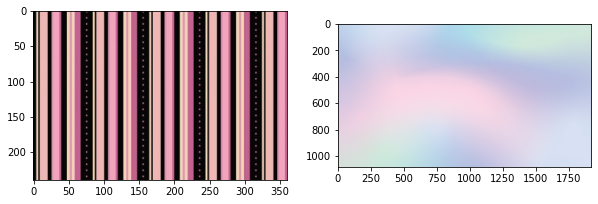

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#Read in image
image_stripes = cv2.imread('image_stripes.jpeg')
#Change color to RGB form BGR
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)
#Read in image
image_solid = cv2.imread('image_solid.png')
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)
#Display image
f, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.imshow(image_stripes)
ax2.imshow(image_solid)

In [32]:
# Convert to greyscal to focus on intensity pstters in the image
gray_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid, cv2.COLOR_RGB2GRAY)
#Normalize the image color values from range [0,255] to [0,1] for further processing
norm_stripers = gray_stripes/255.0
norm_solid = gray_solid/255.0

#Perform a fast Fourier transform and creat a scaled, frequency transform image
def ft_image(norm_image):
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    return frequency_tx


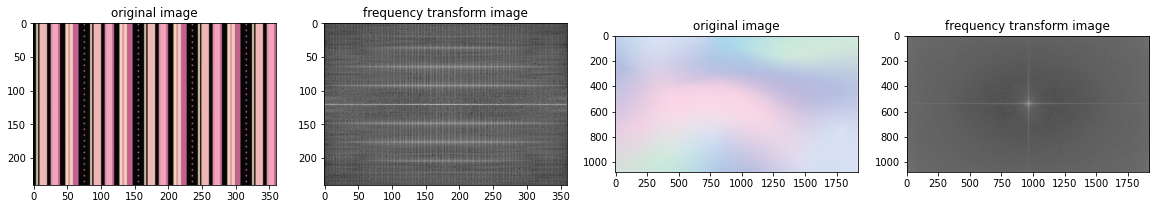

In [33]:
#Call the fast fourier transform function on the normalized images and display the transforms
f_stripers = ft_image(norm_stripers) 
f_solid = ft_image(norm_solid)

#Display the images
#original images to the left of their frequescy transforms
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (20,10))

ax1.set_title('original image')
ax1.imshow(image_stripes)

ax2.set_title('frequency transform image')
ax2.imshow(f_stripers, cmap = 'gray')

ax3.set_title('original image')
ax3.imshow(image_solid)

ax4.set_title('frequency transform image')
ax4.imshow(f_solid, cmap = 'gray')

The transform images for these example show that the solid image has most low-frequency components (as seen by the center bright spot).
The stripes tranform image contains low-frequencies for the areas of white and black color and high frequencies for the edges in between those colors.
the stripes transform image also tells us that there is one dominating direction for these frequencies; vertical stripes are represented by a horizontal line passing through the center of the frequency transform image.